In [1]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt


In [2]:
#Loading the dataset
df = pd.read_csv("/content/Marketing_Campaign_After_Clean.csv")
df.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Loyalty,Age,Children,Spent,TotalAcceptedCmp,MaritalStatus,Family_Size
0,Graduate,58138.0,58,3,8,10,4,7,0,1,605,57,0,1617,0,Single,1
1,Graduate,46344.0,38,2,1,1,2,5,0,0,75,60,2,27,0,Single,3
2,Graduate,71613.0,26,1,8,2,10,4,0,0,286,49,0,776,0,Married,2
3,Graduate,26646.0,26,2,2,0,4,6,0,0,113,30,1,53,0,Married,3
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,67,33,1,422,0,Married,3


In [3]:
df.dtypes

,0
Education,object
Income,float64
Recency,int64
NumDealsPurchases,int64
NumWebPurchases,int64
NumCatalogPurchases,int64
NumStorePurchases,int64
NumWebVisitsMonth,int64
Complain,int64
Response,int64


In [4]:


#seperate Data into cat_col and num_col
cat_col=['Education', 'MaritalStatus', ]
num_col=['Income','Recency','Loyalty', 'Age','Spent','TotalAcceptedCmp','Complain', 'Response','Children', 'Family_Size','NumDealsPurchases','NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [5]:
df.shape

(2041, 17)

# preprocessing

In [6]:
# Create a preprocessing pipeline
prep_pipe = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_col),
    ('scaling', StandardScaler(), num_col)
]).set_output(transform='pandas')

# Fit and transform the entire DataFrame
df_scaled = prep_pipe.fit_transform(df)



In [7]:
df_scaled.shape

(2041, 18)

In [8]:
df_scaled.head()

,ohe__Education_Postgraduate,ohe__Education_Undergraduate,ohe__MaritalStatus_Single,scaling__Income,scaling__Recency,scaling__Loyalty,scaling__Age,scaling__Spent,scaling__TotalAcceptedCmp,scaling__Complain,scaling__Response,scaling__Children,scaling__Family_Size,scaling__NumDealsPurchases,scaling__NumWebPurchases,scaling__NumCatalogPurchases,scaling__NumStorePurchases,scaling__NumWebVisitsMonth
0,0.0,0.0,1.0,0.315821,0.310320,1.480005,1.015727,1.695831,-0.44204,-0.096936,2.367526,-1.279159,-1.762768,0.350094,1.389828,2.639702,-0.554894,0.683364
1,0.0,0.0,1.0,-0.258047,-0.379843,-1.126468,1.273244,-0.965301,-0.44204,-0.096936,-0.422382,1.393066,0.443800,-0.175304,-1.114772,-0.584065,-1.174445,-0.141198
2,0.0,0.0,0.0,0.971482,-0.793941,-0.088796,0.329015,0.288276,-0.44204,-0.096936,-0.422382,-1.279159,-0.659484,-0.700702,1.389828,-0.225869,1.303759,-0.553479
3,0.0,0.0,0.0,-1.216504,-0.793941,-0.939588,-1.301927,-0.921786,-0.44204,-0.096936,-0.422382,0.056953,0.443800,-0.175304,-0.756972,-0.942262,-0.554894,0.271083
4,1.0,0.0,0.0,0.323363,1.552613,-1.165811,-1.044410,-0.304202,-0.44204,-0.096936,-0.422382,0.056953,0.443800,1.400889,0.316428,0.132327,0.064657,-0.141198


# KMEANS

In [9]:
# Initialize the KMeans algorithm with 4 clusters and a maximum of 50 iterations
k = KMeans(n_clusters=2, max_iter=50, random_state=0)

# Fit the KMeans algorithm and predict the cluster labels
y_kmeans = k.fit_predict(df_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = y_kmeans


y_kmeans


array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [10]:
df2 = df[['Education', 'TotalAcceptedCmp', 'Complain', 'Response', 'Children', 'MaritalStatus', 'Family_Size',
 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'Loyalty', 'Age', 'Spent']  ].copy()
df2['Cluster'] = y_kmeans

df2.sample(10)

,Education,TotalAcceptedCmp,Complain,Response,Children,MaritalStatus,Family_Size,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Loyalty,Age,Spent,Cluster
191,Graduate,0,0,0,2,Married,4,31353.0,24,2,1,1,2,8,158,37,31,0
388,Graduate,0,0,0,1,Single,2,23442.0,71,1,1,0,3,7,481,27,27,0
88,Graduate,0,0,0,1,Married,3,54178.0,79,1,2,2,5,2,80,47,194,0
414,Graduate,0,0,0,3,Married,5,48686.0,8,1,1,0,2,8,199,61,20,0
326,Postgraduate,1,0,1,1,Married,3,35178.0,10,1,1,1,2,7,525,43,59,0
1314,Graduate,0,0,0,2,Married,4,44964.0,35,1,1,0,3,8,525,34,41,0
49,Postgraduate,0,0,0,2,Married,4,72550.0,39,9,5,2,12,8,559,60,1319,0
1095,Graduate,0,0,0,2,Married,4,54450.0,0,12,9,2,8,8,653,58,684,0
1186,Graduate,0,0,0,2,Married,4,40521.0,82,1,0,1,2,5,368,46,21,0
1426,Graduate,0,0,0,1,Single,2,37697.0,82,1,2,1,3,6,60,38,84,0


In [11]:
centroids = k.cluster_centers_
centroids

array([[ 0.36925647,  0.14285714,  0.33751044, -0.65231602, -0.00512569,
        -0.06210348, -0.14041088, -0.69668807, -0.29524302,  0.00745467,
        -0.15667641,  0.44651329,  0.39310633,  0.16179314, -0.40963433,
        -0.62955068, -0.59733642,  0.467752  ],
       [ 0.40165877,  0.07582938,  0.39099526,  0.92514488,  0.00726949,
         0.08807805,  0.19913724,  0.98807538,  0.41872736, -0.01057256,
         0.22220576, -0.63326588, -0.55752165, -0.22946255,  0.58096243,
         0.89285802,  0.84717025, -0.66338761]])

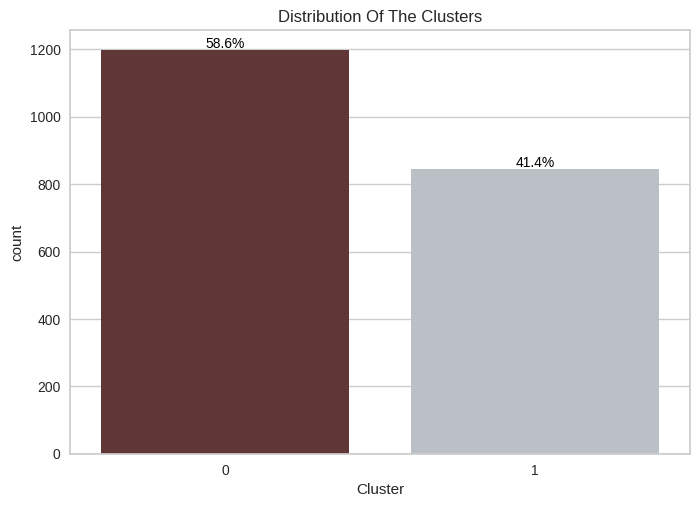

In [12]:

# Define your color palette
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60", "#FF7F50"]  # Color codes

# Create the countplot
pl = sns.countplot(x=df2["Cluster"], palette=pal)
pl.set_title("Distribution Of The Clusters")

# Calculate the total count of all clusters
total = len(df2)

# Annotate percentages on the bars
for p in pl.patches:
    height = p.get_height()
    percentage = 100 * height / total  # Calculate percentage
    pl.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.show()


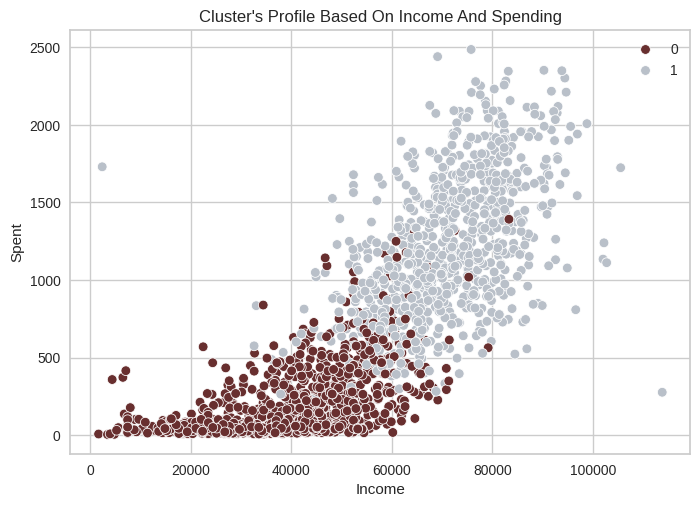

In [13]:
pl = sns.scatterplot(data = df2,x=df2["Income"], y=df2["Spent"],hue=df2["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# Income vs Spending Clusters

The plot shows the pattern of clusters based on income and spending. The clusters are defined as follows:

- **Group 0**: Low Income to Avg income & Low Spending
- **Group 1**: Avg income To  High Income & Avg Spending to High  Spending



In [14]:
# Save the KMeans model to a file using pickle

pickle.dump(k,open('best_model.pkl','wb'))
pickle.dump(prep_pipe, open('prep_pipe.pkl', 'wb'))


#elbow method

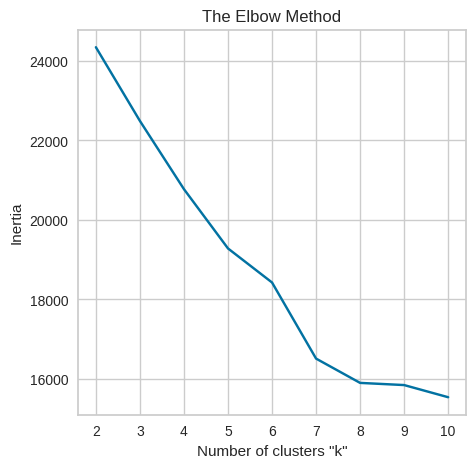

In [15]:
# Step 4: Apply Elbow Method to determine the optimal number of clusters
inertia = []  # List to store the inertia values for each k
k_range = range(2, 11)  # Define range of k to test

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_scaled)  # Fit KMeans on the scaled and encoded data
    inertia.append(kmeans.inertia_)  # Append the inertia for each k

# Step 5: Visualizing the Elbow Method
fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(x=k_range, y=inertia, ax=ax)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters "k"')
plt.ylabel('Inertia')

# Annotate the optimal number of clusters (elbow point)


plt.show()


In [16]:

# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.23506273649199308
For n_clusters=3, the silhouette score is 0.18217311023702035
For n_clusters=4, the silhouette score is 0.13681451469201084
For n_clusters=5, the silhouette score is 0.1384434050913788
For n_clusters=6, the silhouette score is 0.14510178743264754
For n_clusters=7, the silhouette score is 0.11999094623763314
For n_clusters=8, the silhouette score is 0.104751567962188
For n_clusters=9, the silhouette score is 0.11625592761425348
For n_clusters=10, the silhouette score is 0.1204134531992076


Elbow Method to determine the number of clusters to be formed:


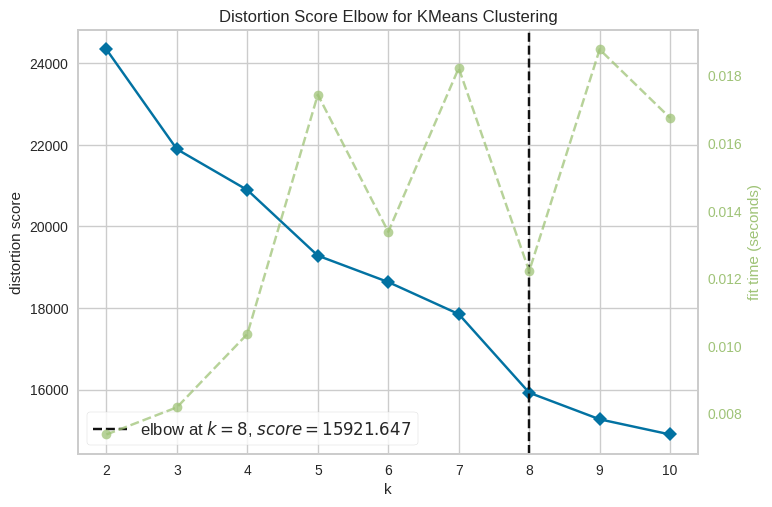

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_scaled)
Elbow_M.show()

# Clustering using Hierarchical Clustering¶


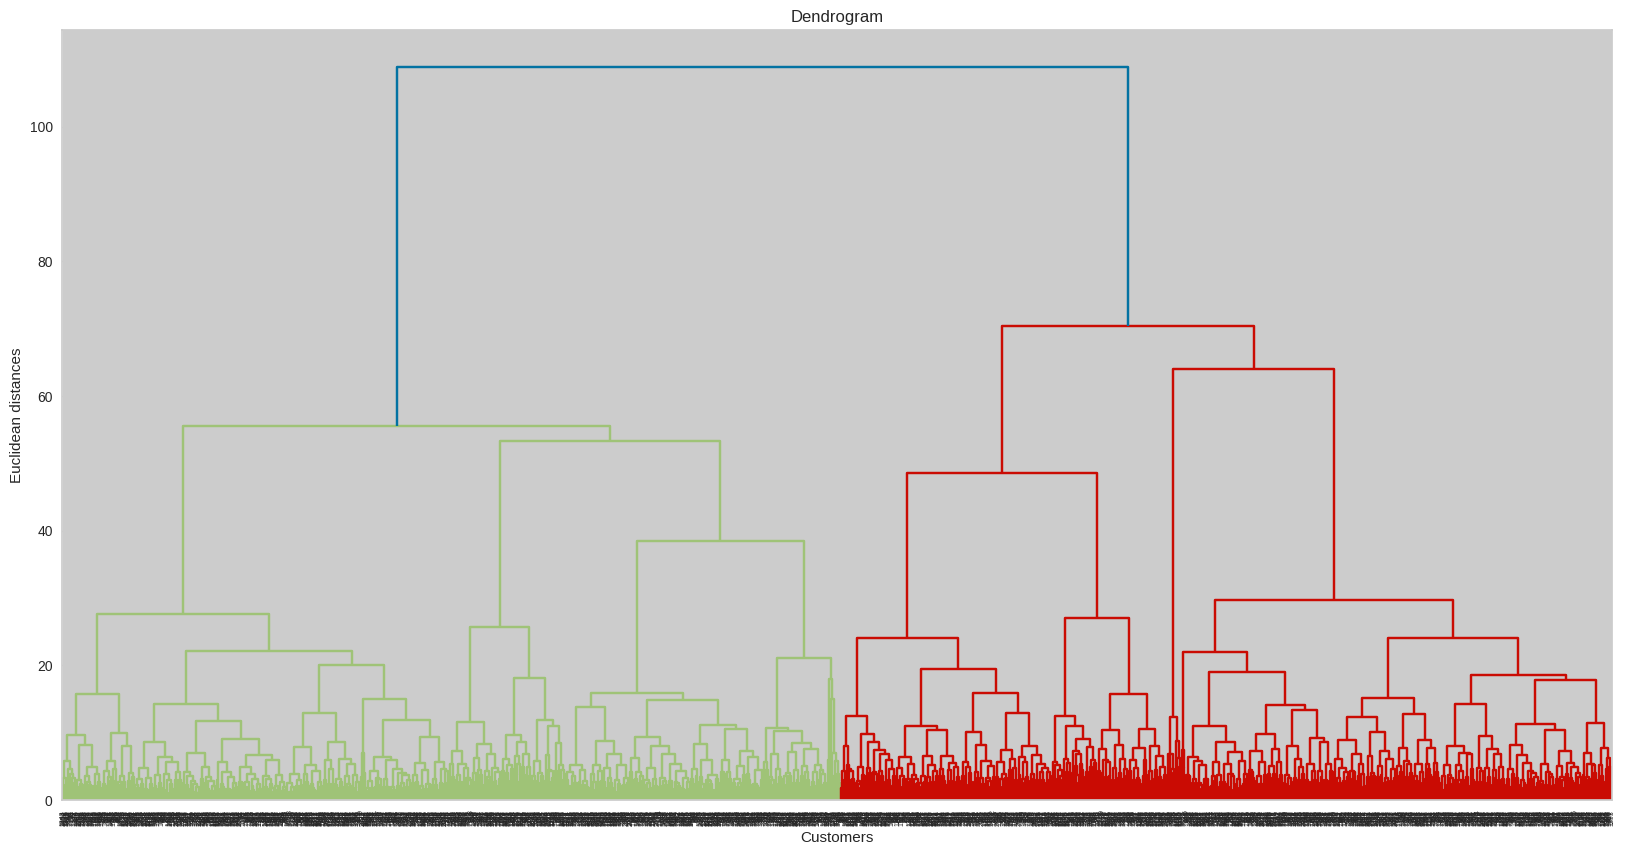

In [18]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

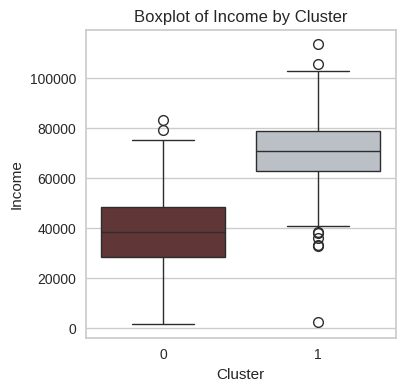

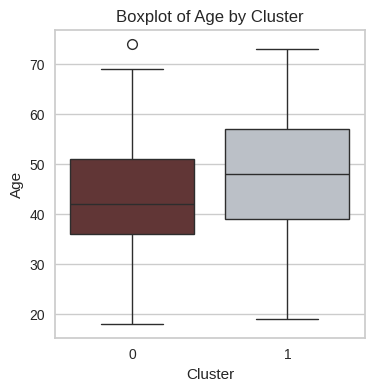

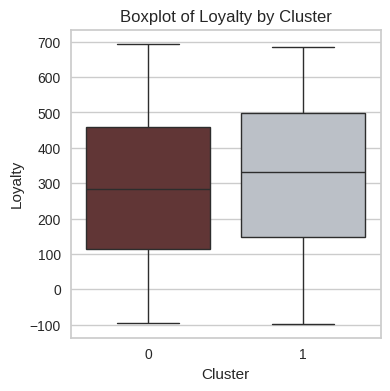

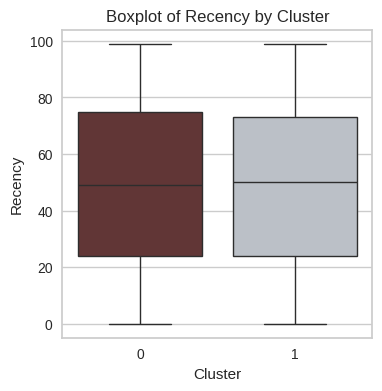

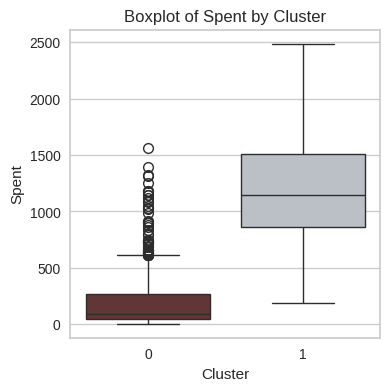

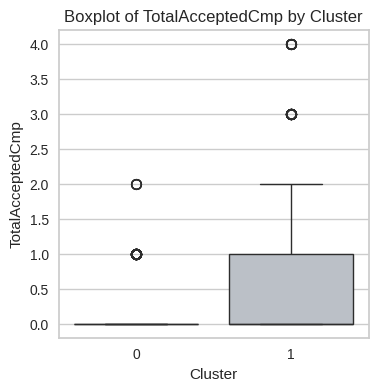

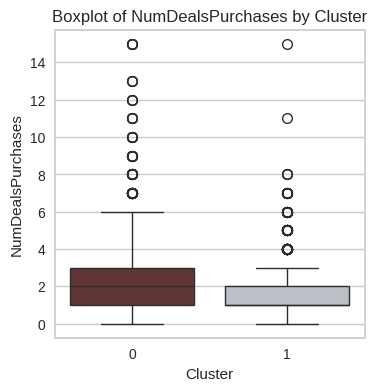

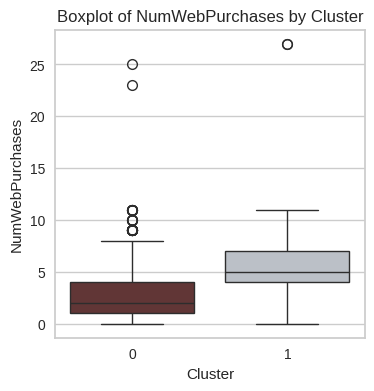

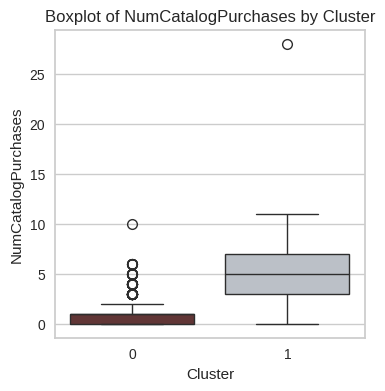

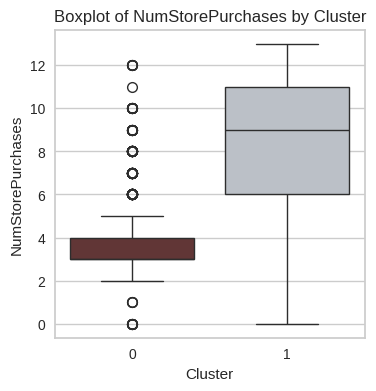

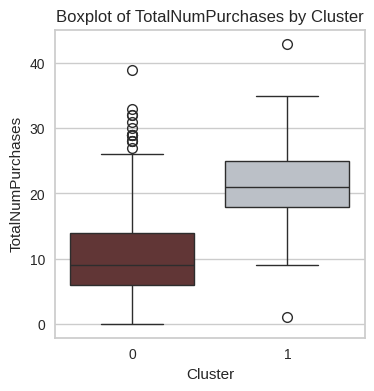

In [19]:

# Select numerical columns to plot
df2['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
columns_to_plot = ['Income', 'Age', 'Loyalty', 'Recency', 'Spent',  'TotalAcceptedCmp', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases','TotalNumPurchases']

# Plot boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='Cluster', y=column, data=df2, palette=pal)  # Adjust palette as needed
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

In [20]:
# Group by the Cluster column to calculate statistics for each cluster
cluster_characteristics = df2.groupby('Cluster').agg({
    'Income': ['mean', 'median', 'std'],
    'Spent': ['mean', 'median', 'std'],
    'Age': ['mean', 'median', 'std'],
    'NumWebPurchases': ['mean', 'median', 'std'],
    'NumStorePurchases': ['mean', 'median', 'std'],
    'TotalNumPurchases': ['mean', 'median', 'std'],
    'Family_Size': ['mean', 'median', 'std'],
    'Loyalty': ['mean', 'median', 'std'],

    # Add other features if needed
})

# Flatten the column names
cluster_characteristics.columns = ['_'.join(col).strip() for col in cluster_characteristics.columns.values]

# Display the characteristics of each cluster
print(cluster_characteristics)


          Income_mean  Income_median    Income_std   Spent_mean  Spent_median  \
Cluster                                                                         
0        38241.060646        38232.0  13743.179174   187.493734          88.0   
1        70660.697390        70656.5  11726.787565  1194.123223        1148.5   

          Spent_std   Age_mean  Age_median    Age_std  NumWebPurchases_mean  \
Cluster                                                                       
0        217.616426  43.531328        42.0  11.003727              2.970760   
1        449.614578  47.486967        48.0  12.149565              5.739336   

         ...  NumStorePurchases_std  TotalNumPurchases_mean  \
Cluster  ...                                                  
0        ...               1.810304               10.348371   
1        ...               2.795189               21.285545   

         TotalNumPurchases_median  TotalNumPurchases_std  Family_Size_mean  \
Cluster                    

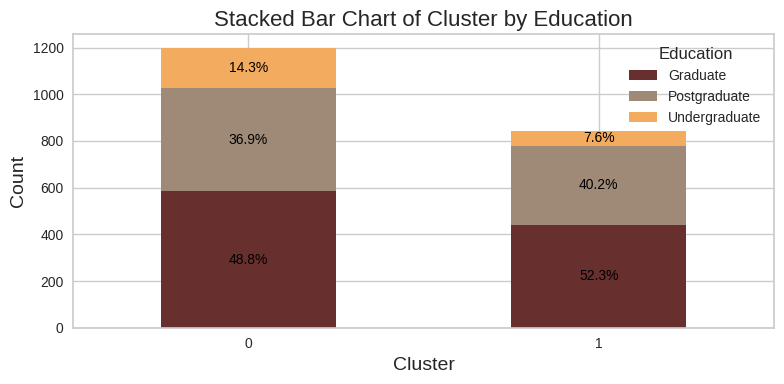

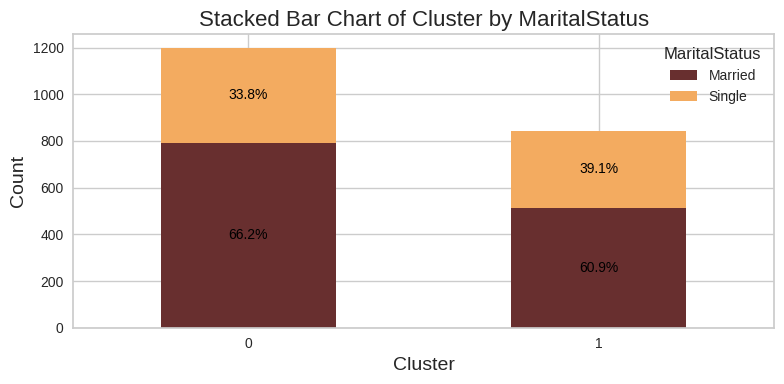

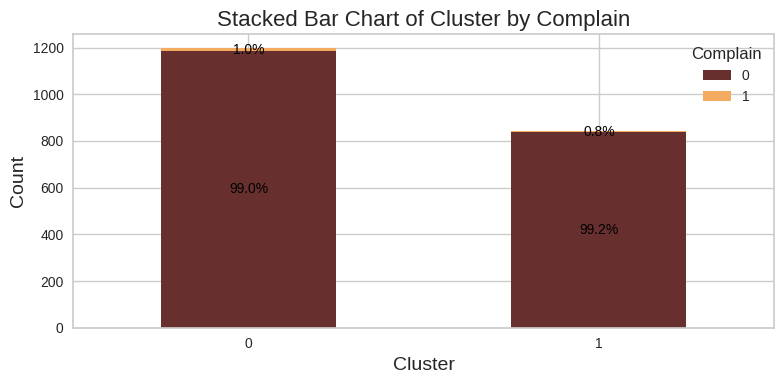

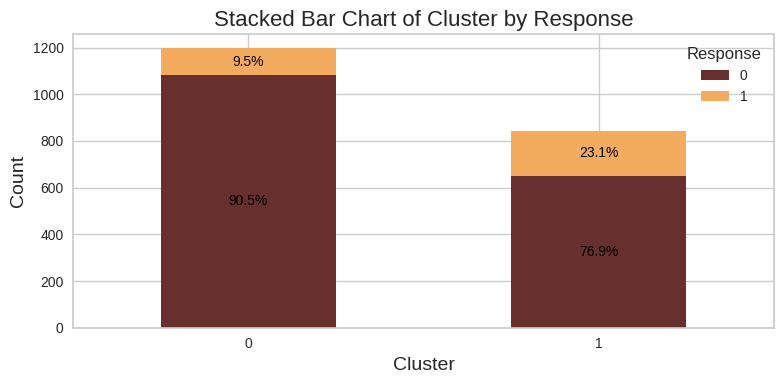

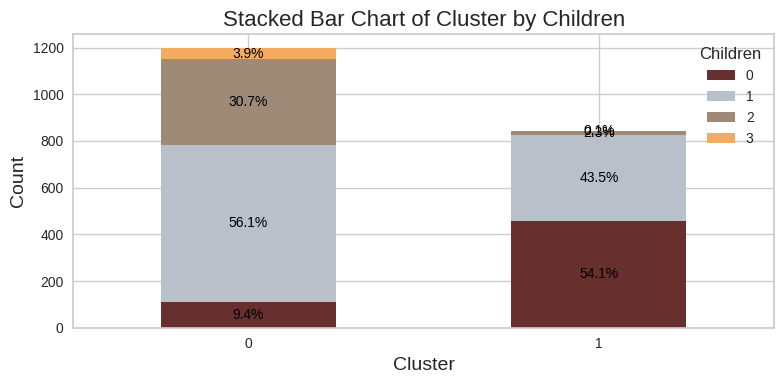

In [21]:
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib.pyplot as plt

# Define the custom colormap
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(pal)

# List of categorical columns to plot
categorical_columns = ['Education', 'MaritalStatus', 'Complain', 'Response', 'Children']

for column in categorical_columns:
    # Prepare data
    data = df2.groupby(['Cluster', column]).size().unstack().fillna(0)

    # Plot stacked bar chart
    ax = data.plot(kind='bar', stacked=True, figsize=(8, 4), colormap=cmap)

    # Calculate total counts for each cluster for percentage annotation
    total_counts = data.sum(axis=1)

    # Annotate percentages on the bars
    for i in range(data.shape[0]):  # Iterate over each cluster
        for j in range(data.shape[1]):  # Iterate over each category
            if data.iloc[i, j] > 0:  # Check if count is greater than 0
                percentage = (data.iloc[i, j] / total_counts[i]) * 100  # Calculate percentage
                ax.annotate(f'{percentage:.1f}%',
                            xy=(i, data.iloc[i, :j+1].sum() - data.iloc[i, j] / 2),
                            ha='center', va='center', fontsize=10, color='black')

    plt.title(f'Stacked Bar Chart of Cluster by {column}', fontsize=16)
    plt.xlabel('Cluster', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()


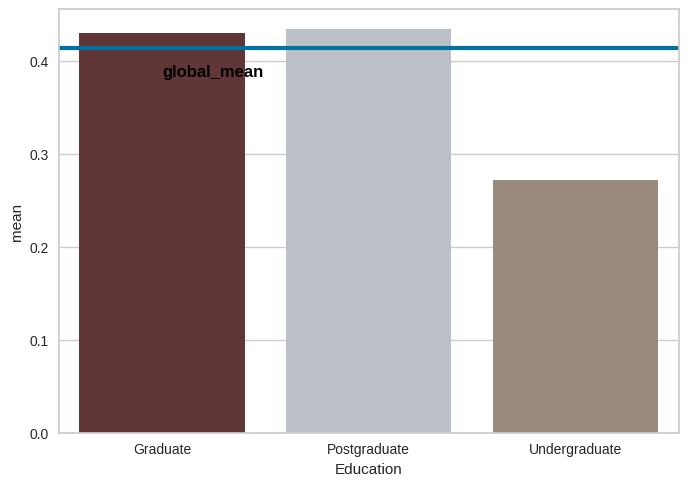

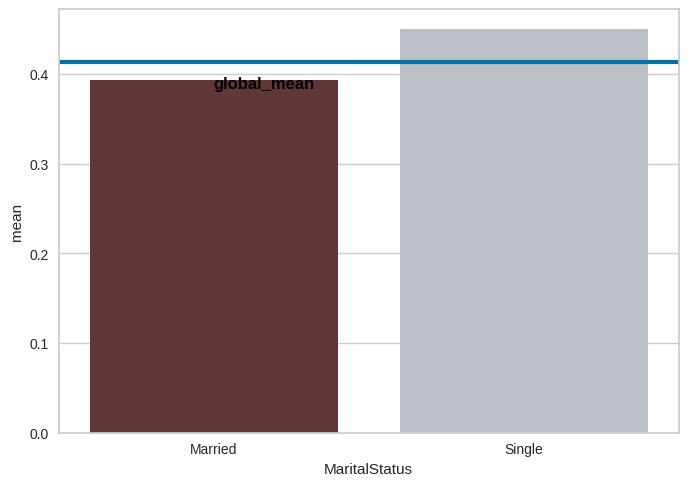

In [23]:
global_mean = df['Cluster'].mean()
global_mean
interested_cols = cat_col
for feature in interested_cols:
    df_group = df.groupby(by=feature).Cluster.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette=pal)
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()